Reference:
https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

## Data loading

In [22]:
DF= pd.read_csv("../Data_v4_AllNaNsReplaced_dummies.csv")
DF.head()

Id  MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  Utilities  \
0   1          60         65.0     8450       2      0         4          4   
1   2          20         80.0     9600       2      0         4          4   
2   3          60         68.0    11250       2      0         3          4   
3   4          70         60.0     9550       2      0         3          4   
4   5          60         84.0    14260       2      0         3          4   

   HouseStyle  OverallQual          ...            SaleType_ConLw  \
0         2.0            7          ...                         0   
1         1.0            6          ...                         0   
2         2.0            7          ...                         0   
3         2.0            7          ...                         0   
4         2.0            8          ...                         0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 214 columns]

In [14]:
DF.shape

(1460, 81)

## Data preprocessing

In [23]:
# Importing the dataset
dataset = DF.copy()

# X is the predictor variable
X = DF.iloc[:, 0:80].values

# y is the response variable
y = DF.SalePrice.values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
import lightgbm as lgb

d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [27]:
#Prediction
y_pred=clf.predict(x_test)
y_pred

array([ 186581.30349092,  170129.23468291,  164392.92165457,
        185948.62806226,  160494.61471585,  159324.77941643,
        208544.04812968,  168368.69705496,  236031.4075619 ,
        176532.56177267,  186026.91693719,  170750.17505912,
        193984.96161745,  165820.45054275,  166344.81219255,
        170268.15375265,  188472.99201696,  165878.25614028,
        172107.90374416,  180354.69913339,  171994.4218665 ,
        172558.85520848,  164648.87397371,  177350.24980279,
        183548.54350333,  184201.62290683,  178303.46999295,
        156537.94743566,  215072.94183462,  164528.4477763 ,
        168932.5139064 ,  185131.96073834,  173553.86517666,
        205291.3064427 ,  234536.06134071,  179247.11889283,
        205285.03468663,  165887.49559528,  198058.7768896 ,
        210328.81898039,  191466.2082665 ,  168937.12642919,
        179517.75617186,  216316.45446976,  228971.57210984,
        167771.29467379,  166581.37104202,  166631.32414237,
        177443.95480257,

In [53]:
mse = np.mean((y_test-y_pred)**2)
mse

4154208395.2175655

In [32]:
mse**0.5

64453.148838653069

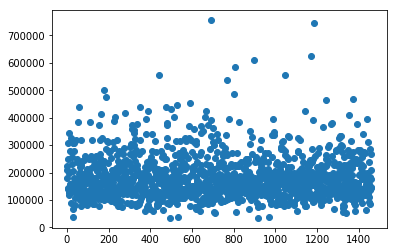

In [52]:
plt.scatter(DF.Id,DF.SalePrice)
plt.show()

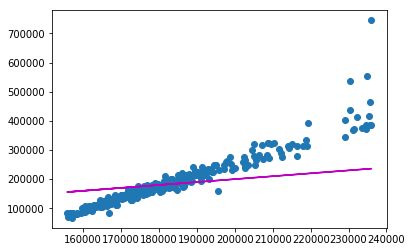

In [44]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_pred,"m")
plt.show()

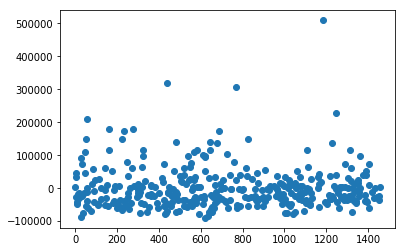

In [51]:
plt.scatter(x_test[:,0],y_test-y_pred)
plt.show()